# 1. Keras Basics

### Importing Image Data (already in the form of array)


In [ ]:
import numpy as np
from numpy import genfromtxt

In [ ]:
data = genfromtxt('DATA/bank_note_data.txt',delimiter=',')
data

In [ ]:
labels = data[:,4]
labels

In [ ]:
features = data[:,0:4]
features

In [ ]:
X = features
y = labels

### Test & Train Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)

print("Length of Xtrain = {} & Xtest = {}".format(len(X_train),len(X_test)))
print("Length of ytrain = {} & ytest = {}".format(len(y_train),len(y_test)))

### Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scalerobj = MinMaxScaler()
scalerobj.fit(X_train)
sX_train = scalerobj.transform(X_train)
sX_test = scalerobj.transform(X_test)

### Model Creation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(4,input_dim = 4,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(sX_train,y_train,epochs=50,verbose=2)

### Results

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

pred = model.predict_classes(sX_test)
confusion_matrix(y_test,pred)

In [ ]:
print(classification_report(y_test,pred))

### Saving & Loading Models

In [ ]:
model.save('DATA/myfirstmodel.h5')

In [ ]:
# from keras.models import load_model
# newmodel = load_model('DATA/myfirstmodel.h5')

# 2. Keras CNN with MNIST

### Importing from keras datasets

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(x_tr,y_tr),(x_te,y_te) = mnist.load_data()

In [ ]:
x_tr.shape

In [ ]:
plt.imshow(x_tr[0],cmap='gray_r')
print(y_tr[0])

### Need to one-hot encode the labels (y) because the NN may assume them as continuous instead of discrete values.

In [ ]:
from keras.utils.np_utils import to_categorical

y_cat_test = to_categorical(y_te,10)
y_cat_train = to_categorical(y_tr,10)

In [ ]:
y_cat_train.shape

### Normalize Image (X) data without scikitlearn

In [ ]:
x_tr = x_tr/x_tr.max()
x_te = x_te/x_te.max()
plt.imshow(x_tr[0],cmap='gray_r')

#The result is the same.

### Adding Color Channel

In [ ]:
x_tr = x_tr.reshape(60000,28,28,1)
x_te = x_te.reshape(10000,28,28,1)
x_tr.shape

### Model Creation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten()) #2d->1d

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics = ['accuracy'])

model.summary()

In [ ]:
model.fit(x_tr,y_cat_train, epochs=2) #default batch_size = 32

In [ ]:
model.evaluate(x_te,y_cat_test)

In [ ]:
from sklearn.metrics import classification_report
pred = model.predict_classes(x_te)
print(classification_report(y_te,pred))

# 3. Real World Examples (& Different Shaped Images)


### Download Raw Images

In [6]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

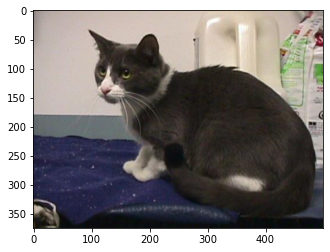

In [7]:
cat = cv2.imread('DATA/CATS_DOGS/train/CAT/4.jpg')
cat = cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)
plt.imshow(cat)

### Preprocessing (Data Augmentation)

In [8]:
from keras.preprocessing.image import ImageDataGenerator
imggn = ImageDataGenerator(rotation_range=30,
                          width_shift_range=0.1,
                          height_shift_range=0.1,
                          rescale=1/255,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True,
                          fill_mode='nearest')
#vertical_flip=True

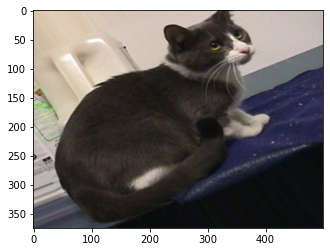

In [9]:
plt.imshow(imggn.random_transform(cat))

In [10]:
imggn.flow_from_directory('DATA/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


### Model Creation

In [11]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [14]:
input_shape = (150,150,3)
b_size = 16

In [16]:
model = Sequential()

#input shape chosen arbitrarily

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) #2d->1d

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

### Model Training

In [17]:
train_imggn = imggn.flow_from_directory('DATA/CATS_DOGS/train/',
                                       target_size = input_shape[:2],
                                       batch_size = 16,
                                       class_mode = 'binary')

test_imggn = imggn.flow_from_directory('DATA/CATS_DOGS/test/',
                                       target_size = input_shape[:2],
                                       batch_size = 16,
                                       class_mode = 'binary')

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [18]:
train_imggn.class_indices

{'CAT': 0, 'DOG': 1}

In [23]:
#steps_per_epoch = limiter on full epoch, to save some time 
# Use model.fit instead of model.fit_generator

results = model.fit_generator(train_imggn,epochs=3,steps_per_epoch=150,
                              validation_data = test_imggn,validation_steps=12)

Epoch 1/3
150/150 [==============================] - 74s 496ms/step - loss: 0.6928 - accuracy: 0.5104 - val_loss: 0.6945 - val_accuracy: 0.4479
Epoch 2/3
150/150 [==============================] - 82s 548ms/step - loss: 0.6896 - accuracy: 0.5350 - val_loss: 0.7205 - val_accuracy: 0.5104
Epoch 3/3
141/150 [===========================>..] - ETA: 4s - loss: 0.6903 - accuracy: 0.5541

C:\Users\CHINMAY\anaconda3\envs\deeplearning\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
C:\Users\CHINMAY\anaconda3\envs\deeplearning\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
C:\Users\CHINMAY\anaconda3\envs\deeplearning\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
C:\Users\CHINMAY\anaconda3\envs\deeplearning\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
C:\Users\CHINMAY\anaconda3\envs\deeplearning\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but 

150/150 [==============================] - 75s 497ms/step - loss: 0.6898 - accuracy: 0.5612 - val_loss: 0.6855 - val_accuracy: 0.6042


In [24]:
results.history['accuracy']

[0.5104166865348816, 0.5350000262260437, 0.5612499713897705]

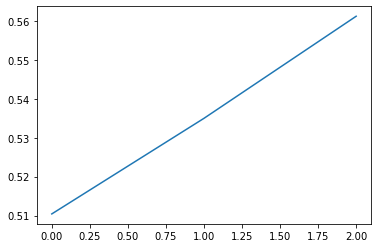

In [25]:
plt.plot(results.history['accuracy'])

### Loading a 100 Epoch Model

# Additions from Images here